In [110]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [111]:
# Lendo o arquivo
df = pd.read_csv("Dados/dados_clientes.csv")

## Análise Exploratória

In [112]:
# Visualizando o tamanhoos  do dataframe
df.shape

(80143, 24)

In [113]:
# Visualizando as colunas
df.columns

Index(['Contrato', 'Idade', 'Sexo', 'Valor_Renda', 'UF_Cliente', 'Perc_Juros',
       'Prazo_Emprestimo', 'Data_Contratacao', 'Prazo_Restante',
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'Escolaridade', 'Possui_Patrimonio',
       'VL_Patrimonio', 'QT_Parcelas_Atraso', 'QT_Dias_Atraso',
       'Saldo_Devedor', 'Total_Pago', 'Possivel_Fraude'],
      dtype='object')

In [114]:
# Visualizando as primeiras linhas
df.head()

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,322090928715,42,M,4000.00,MA,17.00,140,2022-11-18,143,160000.00,184000.00,2,1,1,2,SOLTEIRO(A),NaN,N,0.00,10,284.00,187861.70,1617.36,Sim
1,321990634715,31,M,3000.00,MA,20.00,28,2021-07-23,0,14000.00,16100.00,2,1,1,1,CASADO (A),NaN,N,0.00,26,771.00,16615.93,1239.98,Sim
2,321965373715,36,F,2100.00,SP,24.00,180,2021-04-01,149,60000.00,69000.00,4,1,0,1,CASADO (A),Nenhum,N,0.00,27,802.00,74443.40,1346.64,Sim
3,321967133715,28,M,2155.00,DF,19.00,190,2021-04-10,159,180000.00,207000.00,29,28,0,2,SOLTEIRO(A),Nenhum,N,0.00,2,41.00,196812.41,22713.63,Nao
4,322098744715,21,F,4300.00,MG,22.00,100,2022-12-28,94,30000.00,34500.00,4,3,0,1,SOLTEIRO(A),Ensino Médio,N,0.00,6,162.00,36114.39,900.80,Sim


In [115]:
# Visualizando 10 linhas aleatórias
df.sample(10)

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
36100,322030502715,58,M,2600.00,MG,18.00,100,2022-01-10,82,25000.00,28750.00,22,22,0,0,CASADO (A),NaN,N,0.00,0,NaN,23205.02,6897.52,Nao
46422,321981664715,60,F,15000.00,PR,15.00,150,2021-06-17,125,200000.00,230000.00,29,24,0,0,DIVORCIADO,NaN,N,0.00,0,NaN,187142.91,50610.92,Nao
41577,322042475715,58,M,9000.00,RS,21.00,50,2022-04-11,34,17000.00,19550.00,19,9,5,0,SOLTEIRO(A),NaN,N,0.00,0,NaN,12964.20,8558.60,Nao
61000,321956514715,31,M,1800.00,PA,17.00,20,2021-02-16,-10,3000.00,3450.00,9,2,2,0,OUTRO,NaN,N,0.00,0,NaN,0.00,3839.00,Nao
38889,321957033715,34,F,4500.00,MG,22.00,200,2021-02-18,175,80000.00,92000.00,33,9,14,0,CASADO (A),NaN,N,0.00,0,NaN,82164.04,20088.42,Nao
7472,322051572715,60,M,8000.00,CE,18.00,100,2022-04-29,85,110000.00,126500.00,13,6,2,1,CASADO (A),NaN,N,0.00,5,133.00,114138.87,17994.34,Sim
79540,322044286715,48,M,15000.00,SP,24.00,200,2022-03-25,225,400000.00,460000.00,2,1,1,3,CASADO (A),NaN,N,0.00,14,406.00,498826.60,3168.00,Sim
62623,321979027715,40,M,7500.00,MG,16.00,120,2021-06-07,125,120000.00,138000.00,2,2,0,1,CASADO (A),NaN,N,0.00,27,802.00,139788.56,1339.92,Sim
42271,322045782715,31,M,10000.00,PR,25.00,200,2022-03-29,185,100000.00,115000.00,2,2,0,1,CASADO (A),NaN,N,0.00,17,498.00,125873.62,802.34,Sim
76238,321987691715,55,F,2500.00,PR,21.00,55,2021-07-12,38,20000.00,23000.00,1,1,0,0,OUTRO,Nenhum,N,0.00,27,802.00,24152.70,447.28,Sim


In [116]:
# Visualizando o período dos dados
data_inicial = pd.to_datetime(df['Data_Contratacao']).dt.date.min().strftime('%d/%m/%Y')
data_final = pd.to_datetime(df['Data_Contratacao']).dt.date.max().strftime('%d/%m/%Y')
print('Período: ', data_inicial, ' até ', data_final)

Período:  25/11/2020  até  22/02/2023


In [117]:
# Visualizando as informações básicas do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80143 entries, 0 to 80142
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Contrato                          80143 non-null  int64  
 1   Idade                             80143 non-null  int64  
 2   Sexo                              80143 non-null  object 
 3   Valor_Renda                       80143 non-null  float64
 4   UF_Cliente                        80143 non-null  object 
 5   Perc_Juros                        80143 non-null  float64
 6   Prazo_Emprestimo                  80143 non-null  int64  
 7   Data_Contratacao                  80143 non-null  object 
 8   Prazo_Restante                    80143 non-null  int64  
 9   VL_Emprestimo                     80143 non-null  float64
 10  VL_Emprestimo_ComJuros            80143 non-null  float64
 11  QT_Total_Parcelas_Pagas           80143 non-null  int64  
 12  QT_T

In [118]:
# Visualizando as estatísticas
df.describe()

,Contrato,Idade,Valor_Renda,Perc_Juros,Prazo_Emprestimo,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago
count,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,54348.00,80143.00,80143.00
mean,322023695416.17,38.82,29308.62,19.49,102.33,93.28,72847.78,83774.94,10.71,5.24,2.34,1.30,1.45,10.65,475.26,78622.32,9687.98
std,44697010.94,12.53,2748166.27,3.56,62.32,70.64,87407.93,100519.12,9.31,6.21,3.97,1.27,355.10,10.43,269.79,102318.95,19090.62
min,321944855715.00,4.00,0.00,4.49,14.00,-18.00,3000.00,3450.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00
25%,321984967215.00,29.00,2050.00,18.00,55.00,36.00,15000.00,17250.00,2.00,1.00,0.00,0.00,0.00,0.00,284.00,12122.76,1052.16
50%,322024156715.00,37.00,3000.00,20.00,80.00,78.00,40000.00,46000.00,8.00,2.00,1.00,1.00,0.00,9.00,468.00,35489.36,3951.39
75%,322062662215.00,46.00,5000.00,21.00,170.00,156.00,100000.00,115000.00,18.00,7.00,3.00,2.00,0.00,20.00,708.00,117783.25,10886.24
max,322099706715.00,103.00,765000000.00,28.00,240.00,227.00,500000.00,575000.00,66.00,66.00,31.00,38.00,100000.00,34.00,1014.00,626261.27,465821.39


In [119]:
# Verificando se existem valores ausentes (TRATAR)
df.isnull().sum()

Contrato                                0
Idade                                   0
Sexo                                    0
Valor_Renda                             0
UF_Cliente                              0
Perc_Juros                              0
Prazo_Emprestimo                        0
Data_Contratacao                        0
Prazo_Restante                          0
VL_Emprestimo                           0
VL_Emprestimo_ComJuros                  0
QT_Total_Parcelas_Pagas                 0
QT_Total_Parcelas_Pagas_EmDia           0
QT_Total_Parcelas_Pagas_EmAtraso        0
Qt_Renegociacao                         0
Estado_Civil                            0
Escolaridade                        57298
Possui_Patrimonio                       0
VL_Patrimonio                           0
QT_Parcelas_Atraso                      0
QT_Dias_Atraso                      25795
Saldo_Devedor                           0
Total_Pago                              0
Possivel_Fraude                   

In [120]:
df['QT_Dias_Atraso'].median()

468.0

In [121]:
# Verificando os valores únicos de cada coluna do DataFrame
unique_values = []
for i in df.columns[:24].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    unique_values.append(len(df[i].astype(str).value_counts()))

Contrato : 80143
Idade : 86
Sexo : 2
Valor_Renda : 4747
UF_Cliente : 27
Perc_Juros : 53


Prazo_Emprestimo : 60
Data_Contratacao : 751
Prazo_Restante : 93
VL_Emprestimo : 73
VL_Emprestimo_ComJuros : 73
QT_Total_Parcelas_Pagas : 50
QT_Total_Parcelas_Pagas_EmDia : 48
QT_Total_Parcelas_Pagas_EmAtraso : 32
Qt_Renegociacao : 15
Estado_Civil : 8
Escolaridade : 6
Possui_Patrimonio : 2
VL_Patrimonio : 4
QT_Parcelas_Atraso : 35
QT_Dias_Atraso : 39
Saldo_Devedor : 64166
Total_Pago : 54074
Possivel_Fraude : 2


In [122]:
# Identificando possíveis outliers explícitos
print('Maior Idade: ', df['Idade'].max())
print('Menor Idade: ', df['Idade'].min())
print('----------------------------------------------------')
print('Maior Renda:', df['Valor_Renda'].max())
print('Menor Renda:', df['Valor_Renda'].min())
print('----------------------------------------------------')
print('Maior Juros:', df['Perc_Juros'].max())
print('Menor Juros:', df['Perc_Juros'].min())
print('----------------------------------------------------')
print('Maior qtd de dias restante: ', df['Prazo_Restante'].max())
print('Menor qtd de dias restante: ', df['Prazo_Restante'].min())
print('----------------------------------------------------')
print('Maior qtd de parcelas em atraso: ', df['QT_Parcelas_Atraso'].max())
print('Menor qtd de parcelas em atraso: ', df['QT_Parcelas_Atraso'].min())
print('----------------------------------------------------')
print('Maior qtd de dias de atraso: ', df['QT_Dias_Atraso'].max())
print('Menor qtd de dias de atraso: ', df['QT_Dias_Atraso'].min())
print('----------------------------------------------------')


Maior Idade:  103
Menor Idade:  4
----------------------------------------------------
Maior Renda: 765000000.0
Menor Renda: 0.0
----------------------------------------------------
Maior Juros: 28.0
Menor Juros: 4.4931
----------------------------------------------------
Maior qtd de dias restante:  227
Menor qtd de dias restante:  -18
----------------------------------------------------
Maior qtd de parcelas em atraso:  34
Menor qtd de parcelas em atraso:  0
----------------------------------------------------
Maior qtd de dias de atraso:  1014.0
Menor qtd de dias de atraso:  11.0
----------------------------------------------------


In [123]:
# Verificando a distribuição da idade dos clientes (AJUSTAR)
df.groupby(['Idade']).size()

Idade
4         2
6         1
7         1
8         1
9         1
10        1
17       12
18       60
19      424
20     1065
21     1533
22     1688
23     2059
24     2047
25     2310
26     2516
27     2431
28     2641
29     2652
30     2591
31     2512
32     2532
33     2429
34     2493
35     2577
36     2596
37     2333
38     2340
39     2301
40     2214
41     2325
42     2078
43     1997
44     2056
45     1831
46     1691
47     1503
48     1386
49     1366
50     1202
51     1293
52     1056
53     1060
54      977
55      934
56      825
57      781
58      772
59      733
60      716
61      558
62      533
63      470
64      418
65      364
66      379
67      308
68      312
69      332
70      285
71      226
72      148
73      210
74      112
75       93
76       95
77       63
78       59
79       37
80       46
81       33
82       30
83       24
84       19
85       11
86        9
87        5
88        7
89        3
90        3
91        1
92        1
94        

In [124]:
# Verificando valores discrepantes na coluna de prazo dos empréstimos
df.groupby(['Prazo_Emprestimo']).size()

Prazo_Emprestimo
14         1
15        46
16        19
17         1
18       104
19        21
20      1646
22         1
24         1
25      1749
28        42
29         5
30      2230
34         7
35      1588
36      3710
38        10
39         2
40      1671
42        99
43        13
45      1818
46         1
48      1857
49         9
50      3139
55      1687
58         1
60     10286
61         2
62         1
65       353
70      1271
75      1136
78        12
80      7241
85         9
88         2
90      1825
95       192
100    11720
120     1359
125        6
130      164
135       62
140      815
150      896
155       15
159        6
160      729
165       11
170      971
180     2104
190     5417
199       13
200    10246
210        1
230        8
235      144
240     1648
dtype: int64

In [125]:
# Verificando valores discrepantes na coluna de dias de atraso
df.groupby(['QT_Dias_Atraso']).size()

QT_Dias_Atraso
11.00      3626
41.00      1572
71.00      1115
103.00     1028
133.00      860
162.00      914
194.00     1027
225.00     1330
251.00     1957
284.00     1956
315.00     1833
344.00     1986
376.00     2177
406.00     2024
435.00     1980
437.00        3
468.00     1977
498.00     1873
529.00     1750
559.00     1848
589.00     1840
617.00     1911
649.00     2036
680.00     1836
705.00        1
708.00     1936
736.00        3
741.00     2180
764.00        1
771.00     1952
802.00     1731
833.00     1471
862.00     1174
894.00     1061
924.00      988
953.00      962
981.00      427
1014.00       2
dtype: int64

In [126]:
# Verificando a distribuição geográfica dos clientes
df.groupby(['UF_Cliente']).size()

UF_Cliente
AC       25
AL      867
AM       76
AP       23
BA     6709
CE     2050
DF      583
ES      312
GO     3860
MA     3593
MG    13718
MS     2120
MT      984
PA     3443
PB     1442
PE     2502
PI      731
PR     5794
RJ     2462
RN      759
RO       55
RR       15
RS     3500
SC     2555
SE      415
SP    21393
TO      157
dtype: int64

In [127]:
# Verificando a coluna Sexo
df.groupby(['Sexo']).size()

Sexo
F    31643
M    48500
dtype: int64

In [128]:
# Verificando a coluna de estado civil - (AJUSTAR)
df.groupby(['Estado_Civil']).size()

Estado_Civil
CASADO (A)                23576
DIVORCIADO                 3783
NENHUM                        4
OUTRO                      5912
SEPARADO JUDICIALMENTE        4
SOLTEIRO(A)               45205
UNIÃO ESTAVEL               501
VIÚVO(A)                   1158
dtype: int64

In [129]:
# Verificando a coluna de patrimônio
df.groupby(['Possui_Patrimonio']).size()

Possui_Patrimonio
N    79785
S      358
dtype: int64

In [130]:
# Verificando a coluna do valor do patrimônio
df.groupby(['VL_Patrimonio']).size()

VL_Patrimonio
0.00         80135
1000.00          6
10000.00         1
100000.00        1
dtype: int64

In [131]:
# Verificando a coluna de grau de instrução
df.groupby(['Escolaridade']).size()

Escolaridade
Ensino Fundamental                        126
Ensino Médio                              902
Ensino Superior                           600
Nenhum                                  21168
Pós Graduação / Mestrado / Doutorado       49
dtype: int64

In [132]:
# Verificando a coluna alvo ou TARGET
df.groupby(['Possivel_Fraude']).size()

Possivel_Fraude
Nao    35632
Sim    44511
dtype: int64

In [133]:
# Ajustando as categorias de ESTADO_CIVIL
df['Estado_Civil'] = df['Estado_Civil'].replace(['NENHUM'], 'OUTRO')
df['Estado_Civil'] = df['Estado_Civil'].replace(['UNIÃO ESTAVEL'], 'CASADO (A)')
df['Estado_Civil'] = df['Estado_Civil'].replace(['SEPARADO JUDICIALMENTE'], 'DIVORCIADO')

df.groupby(['Estado_Civil']).size()

Estado_Civil
CASADO (A)     24077
DIVORCIADO      3787
OUTRO           5916
SOLTEIRO(A)    45205
VIÚVO(A)        1158
dtype: int64

In [134]:
# Removendo os clientes fora da faixa de idade apta a contratar empréstimos
df = df[(df['Idade'] >= 18) & (df['Idade'] <= 85)]
df.groupby(['Idade']).size()

Idade
18      60
19     424
20    1065
21    1533
22    1688
23    2059
24    2047
25    2310
26    2516
27    2431
28    2641
29    2652
30    2591
31    2512
32    2532
33    2429
34    2493
35    2577
36    2596
37    2333
38    2340
39    2301
40    2214
41    2325
42    2078
43    1997
44    2056
45    1831
46    1691
47    1503
48    1386
49    1366
50    1202
51    1293
52    1056
53    1060
54     977
55     934
56     825
57     781
58     772
59     733
60     716
61     558
62     533
63     470
64     418
65     364
66     379
67     308
68     312
69     332
70     285
71     226
72     148
73     210
74     112
75      93
76      95
77      63
78      59
79      37
80      46
81      33
82      30
83      24
84      19
85      11
dtype: int64

In [135]:
# Tratando valores ausentes através da mediana
df['QT_Dias_Atraso'] = df['QT_Dias_Atraso'].fillna((df['QT_Dias_Atraso'].median()))
print(df['QT_Dias_Atraso'].isnull().sum()) 

0


In [136]:
# Criando faixa etaria
bins = [0, 21, 35, 45, 55, 65, 75, 100]
labels = ['Até 21 Anos', 'De 22 até 35 Anos', 'De 36 até 45 Anos', 'De 46 até 55 Anos', 'De 56 até 65', 'De 66 até 75', 'Acima de 75 Anos']
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=bins, labels=labels)
df.groupby(['Faixa_Etaria']).size()

Faixa_Etaria
Até 21 Anos           3082
De 22 até 35 Anos    33478
De 36 até 45 Anos    22071
De 46 até 55 Anos    12468
De 56 até 65          6170
De 66 até 75          2405
Acima de 75 Anos       417
dtype: int64

In [137]:
# Criando faixas salariais
bins = [-100, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 1000000000]
labels = ['Até 1k', 'De 1k até 2k', 'De 2k até 3k', 'De 3k até 5k', 'De 5k até 10k', 'De 10k até 20k', 'De 20k até 30k', 'Acima de 30k']
df['Faixa_Salarial'] = pd.cut(df['Valor_Renda'], bins=bins, labels=labels)
df.groupby(['Faixa_Salarial']).size()

Faixa_Salarial
Até 1k              254
De 1k até 2k      19615
De 2k até 3k      21480
De 3k até 5k      21092
De 5k até 10k     11667
De 10k até 20k     3504
De 20k até 30k     1044
Acima de 30k       1435
dtype: int64

In [138]:
# Criando faixas de prazo de empréstimo
bins = [0, 36, 60, 120, 180, 720]
labels = ['Até 36 Meses', 'De 37 até 60 Meses', 'De 61 até 120 Meses', 'De 121 até 180 Meses', 'Acima de 180 Meses']
df['Faixa_Prazo_Emprestimo'] = pd.cut(df['Prazo_Emprestimo'], bins=bins, labels=labels)
pd.value_counts(df.Faixa_Prazo_Emprestimo).sort_index()

Faixa_Prazo_Emprestimo
Até 36 Meses            11166
De 37 até 60 Meses      20581
De 61 até 120 Meses     25099
De 121 até 180 Meses     5778
Acima de 180 Meses      17467
Name: count, dtype: int64

In [139]:
print('Maior Prazo Restante:', df['Prazo_Restante'].max())
print('Menor Prazo Restante:', df['Prazo_Restante'].min())

Maior Prazo Restante: 227
Menor Prazo Restante: -18


In [140]:
# Criando faixas de prazo restante
bins = [-20, 60, 120, 180, 2000]
labels = ['Até 60 Meses', 'De 61 até 120 Meses', 'De 121 até 180 Meses', 'Acima de 180 Meses']
df['Faixa_Prazo_Restante'] = pd.cut(df['Prazo_Restante'], bins=bins, labels=labels)
pd.value_counts(df.Faixa_Prazo_Restante).sort_index()

Faixa_Prazo_Restante
Até 60 Meses            31016
De 61 até 120 Meses     24729
De 121 até 180 Meses     9725
Acima de 180 Meses      14621
Name: count, dtype: int64

In [141]:
print(df['Faixa_Prazo_Restante'].isnull().sum()) 

0


In [142]:
# Criando faixa de dias em atraso
bins = [-100, 30, 60, 90, 120, 180, 240, 365, 2000]
labels = ['Até 30 dias', 'De 31 até 60', 'De 61 até 90', 'De 91 até 120', 'De 121 até 180', 'De 181 até 240','De 241 até 365', 'Acima de 365']
df['Faixa_Dias_Atraso'] = pd.cut(df['QT_Dias_Atraso'], bins=bins, labels=labels)
df.groupby(['Faixa_Dias_Atraso']).size()

Faixa_Dias_Atraso
Até 30 dias        3625
De 31 até 60       1570
De 61 até 90       1114
De 91 até 120      1027
De 121 até 180     1772
De 181 até 240     2356
De 241 até 365     7726
Acima de 365      60901
dtype: int64

In [143]:
# Visualizando os dados após as mudanças
df.sample(5)

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude,Faixa_Etaria,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Prazo_Restante,Faixa_Dias_Atraso
42819,321997915715,57,F,1600.00,MA,24.00,25,2021-08-21,8,3000.00,3450.00,2,0,2,0,CASADO (A),NaN,N,0.00,23,771.00,3688.86,310.83,Sim,De 56 até 65,De 1k até 2k,Até 36 Meses,Até 60 Meses,Acima de 365
39044,322010586715,32,M,3000.00,CE,21.00,60,2021-10-16,37,11000.00,12650.00,4,1,2,1,CASADO (A),NaN,N,0.00,21,617.00,12868.30,920.46,Sim,De 22 até 35 Anos,De 2k até 3k,De 37 até 60 Meses,Até 60 Meses,Acima de 365
40792,322016806715,58,M,4000.00,SC,21.00,40,2021-11-12,25,25000.00,28750.00,22,1,1,3,CASADO (A),NaN,N,0.00,0,468.00,8000.67,23559.74,Nao,De 56 até 65,De 3k até 5k,De 37 até 60 Meses,Até 60 Meses,Acima de 365
74270,321965508715,47,M,1600.00,MG,21.00,50,2021-04-03,25,10000.00,11500.00,21,15,5,0,CASADO (A),NaN,N,0.00,0,468.00,0.00,14208.55,Nao,De 46 até 55 Anos,De 1k até 2k,De 37 até 60 Meses,Até 60 Meses,Acima de 365
60596,321982908715,40,M,6000.00,SP,21.00,60,2021-06-23,38,8000.00,9200.00,21,9,10,3,CASADO (A),Nenhum,N,0.00,2,41.00,6406.79,3627.84,Nao,De 36 até 45 Anos,De 5k até 10k,De 37 até 60 Meses,Até 60 Meses,De 31 até 60


In [144]:
# Substituindo os valores nulos na coluna 'Escolaridade' por "Nenhum"
df['Escolaridade'].fillna('Nenhum', inplace=True)
# Verificando o DataFrame após a substituição
print(df['Escolaridade'].isnull().sum()) 

0


## Visualização dos dados através de gráficos

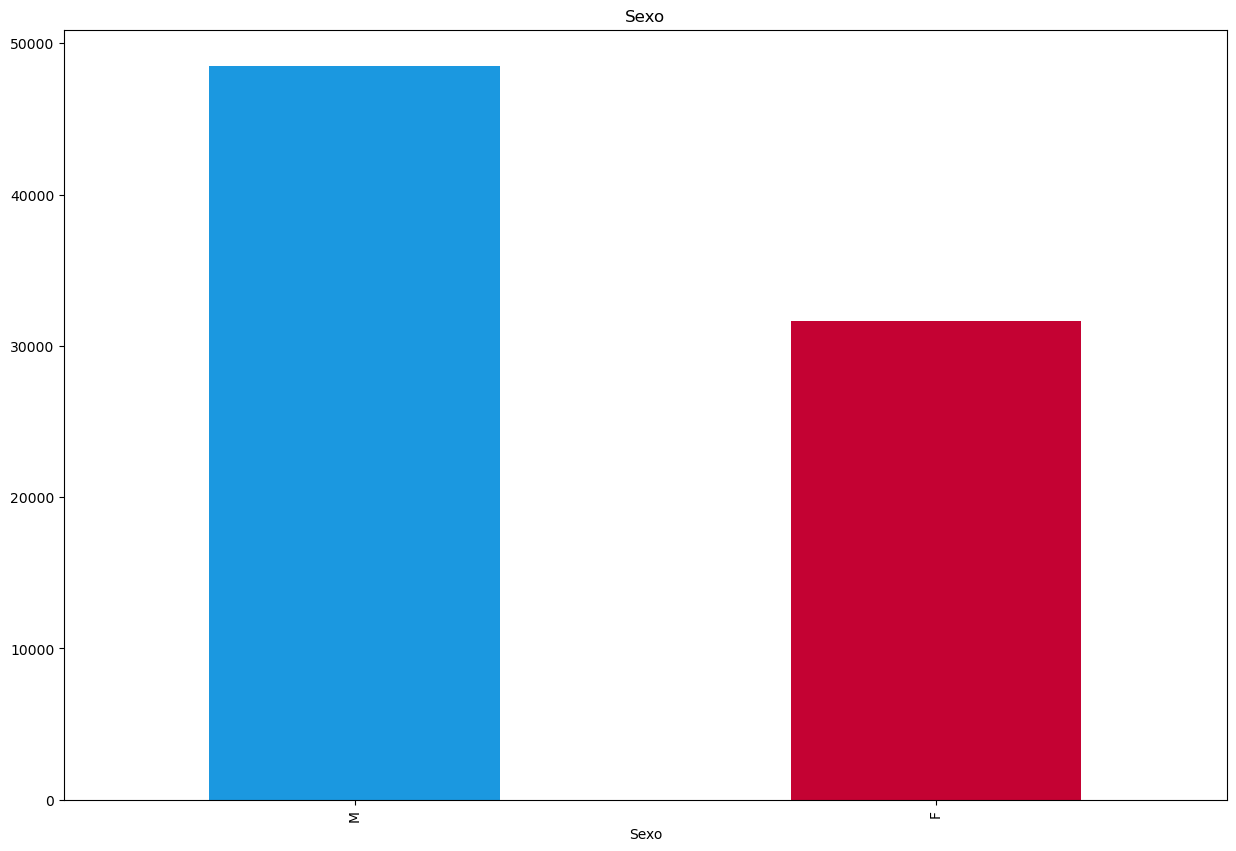

In [145]:
df.Sexo.value_counts().plot(kind='bar', title='Sexo', color = ['#1B98E0', '#C40233']);

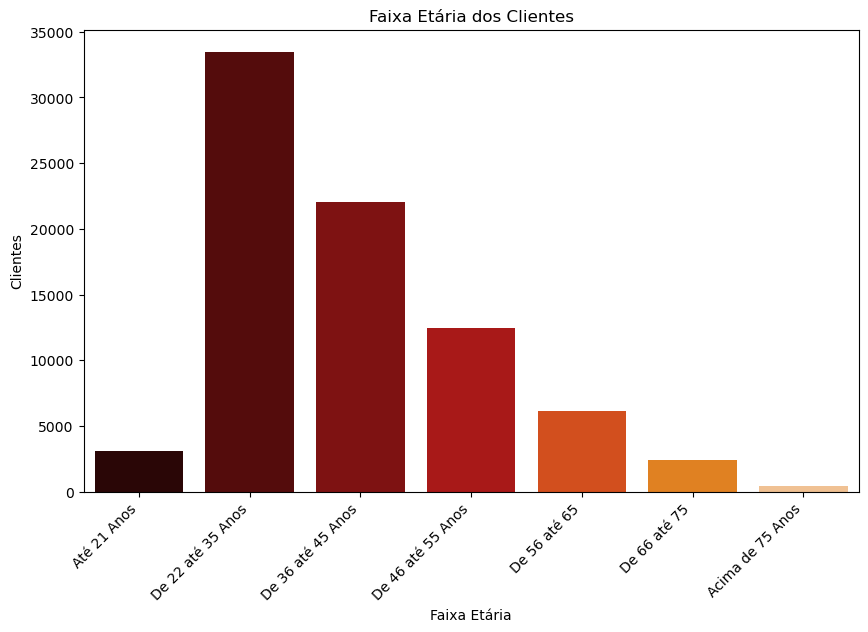

In [146]:
faixa_etaria = df.groupby('Faixa_Etaria')['Contrato'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Faixa_Etaria', y='Contrato', data=faixa_etaria, palette='gist_heat')
plt.title('Faixa Etária dos Clientes')
plt.xlabel('Faixa Etária')
plt.ylabel('Clientes')
plt.xticks(rotation=45, ha='right')
plt.show()

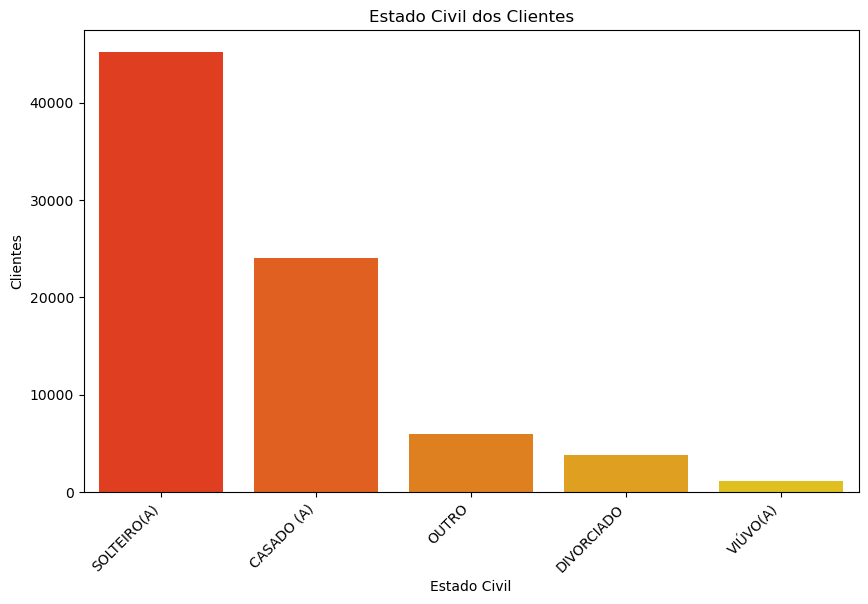

In [147]:
estado_civil = df.groupby('Estado_Civil')['Contrato'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Estado_Civil', y='Contrato', data=estado_civil, palette='autumn')
plt.title('Estado Civil dos Clientes')
plt.xlabel('Estado Civil')
plt.ylabel('Clientes')
plt.xticks(rotation=45, ha='right')
plt.show()

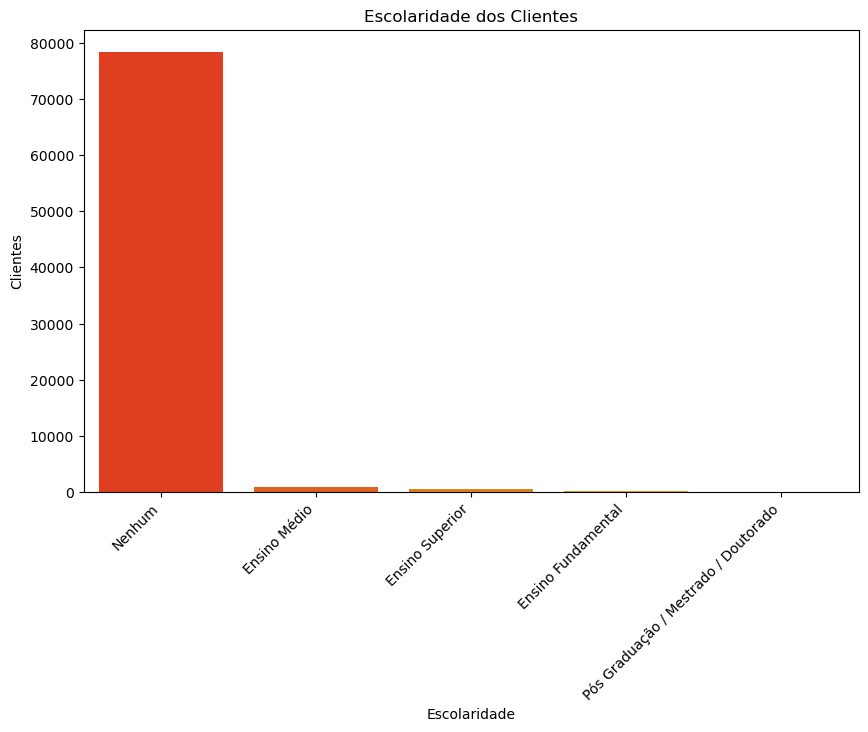

In [148]:
grau_instrucao = df.groupby('Escolaridade')['Contrato'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Escolaridade', y='Contrato', data=grau_instrucao, palette='autumn')
plt.title('Escolaridade dos Clientes')
plt.xlabel('Escolaridade')
plt.ylabel('Clientes')
plt.xticks(rotation=45, ha='right')
plt.show()

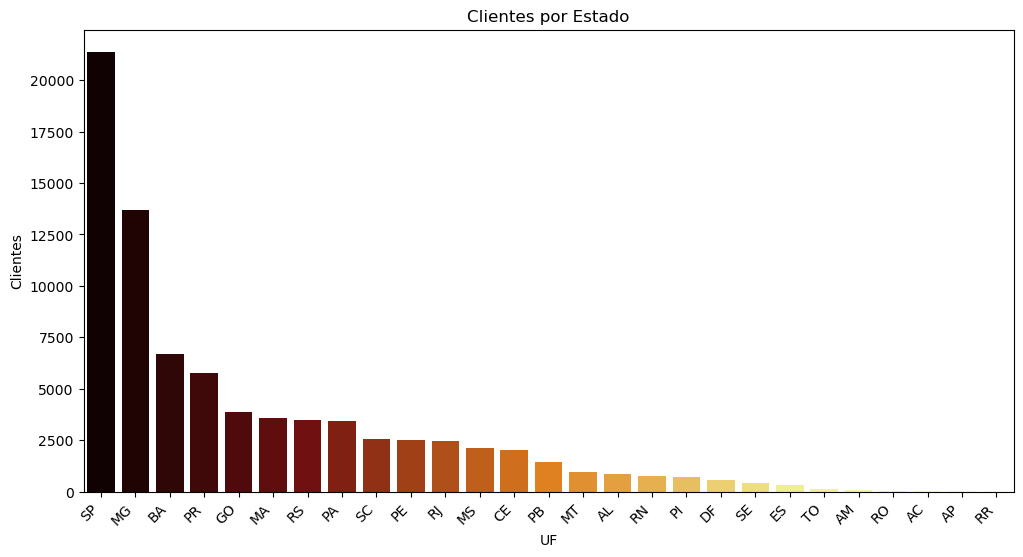

In [149]:
cliente_UF = df.groupby('UF_Cliente')['Contrato'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='UF_Cliente', y='Contrato', data=cliente_UF, palette='afmhot')
plt.title('Clientes por Estado')
plt.xlabel('UF')
plt.ylabel('Clientes')
plt.xticks(rotation=45, ha='right')
plt.show()

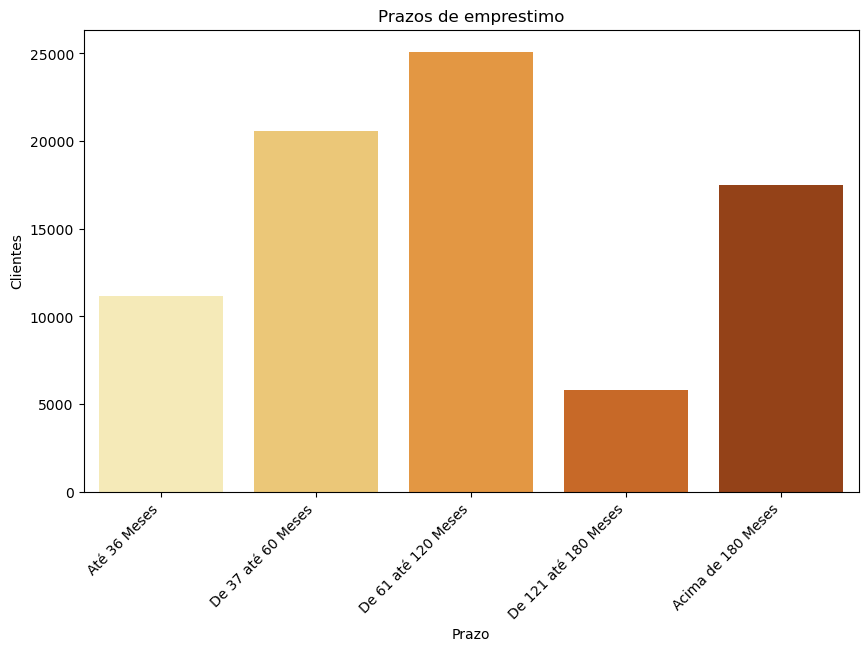

In [150]:
Prazo_emprestimo = df.groupby('Faixa_Prazo_Emprestimo')['Contrato'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Faixa_Prazo_Emprestimo', y='Contrato', data=Prazo_emprestimo, palette='YlOrBr')
plt.title('Prazos de emprestimo')
plt.xlabel('Prazo')
plt.ylabel('Clientes')
plt.xticks(rotation=45, ha='right')
plt.show()

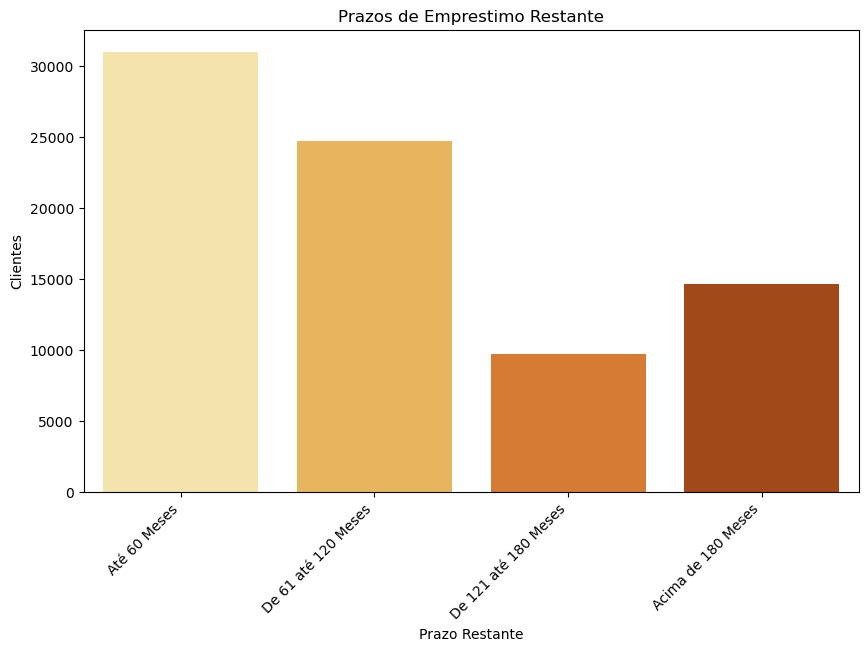

In [151]:
Prazo_restante = df.groupby('Faixa_Prazo_Restante')['Contrato'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Faixa_Prazo_Restante', y='Contrato', data=Prazo_restante, palette='YlOrBr')
plt.title('Prazos de Emprestimo Restante')
plt.xlabel('Prazo Restante')
plt.ylabel('Clientes')
plt.xticks(rotation=45, ha='right')
plt.show()

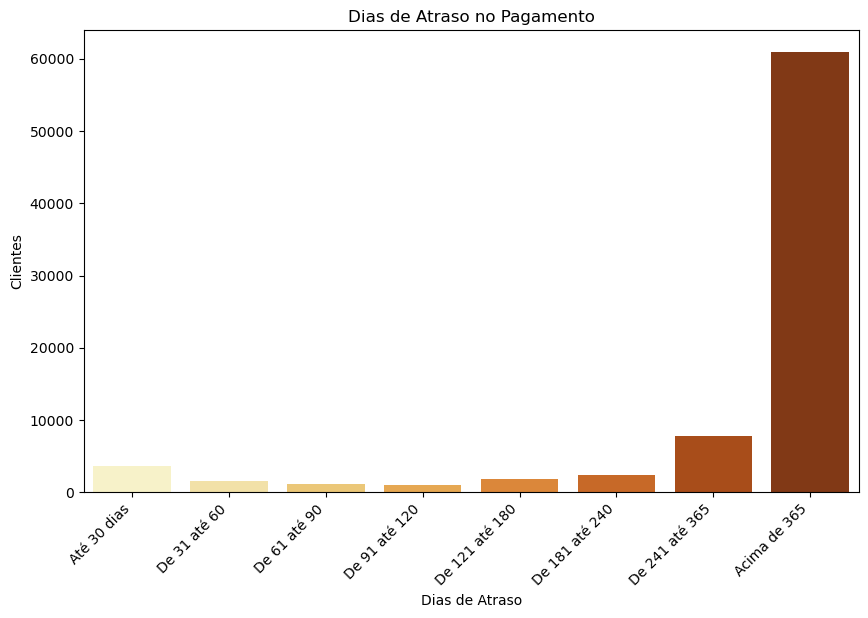

In [152]:
dias_atraso = df.groupby('Faixa_Dias_Atraso')['Contrato'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Faixa_Dias_Atraso', y='Contrato', data=dias_atraso, palette='YlOrBr')
plt.title('Dias de Atraso no Pagamento')
plt.xlabel('Dias de Atraso')
plt.ylabel('Clientes')
plt.xticks(rotation=45, ha='right')
plt.show()

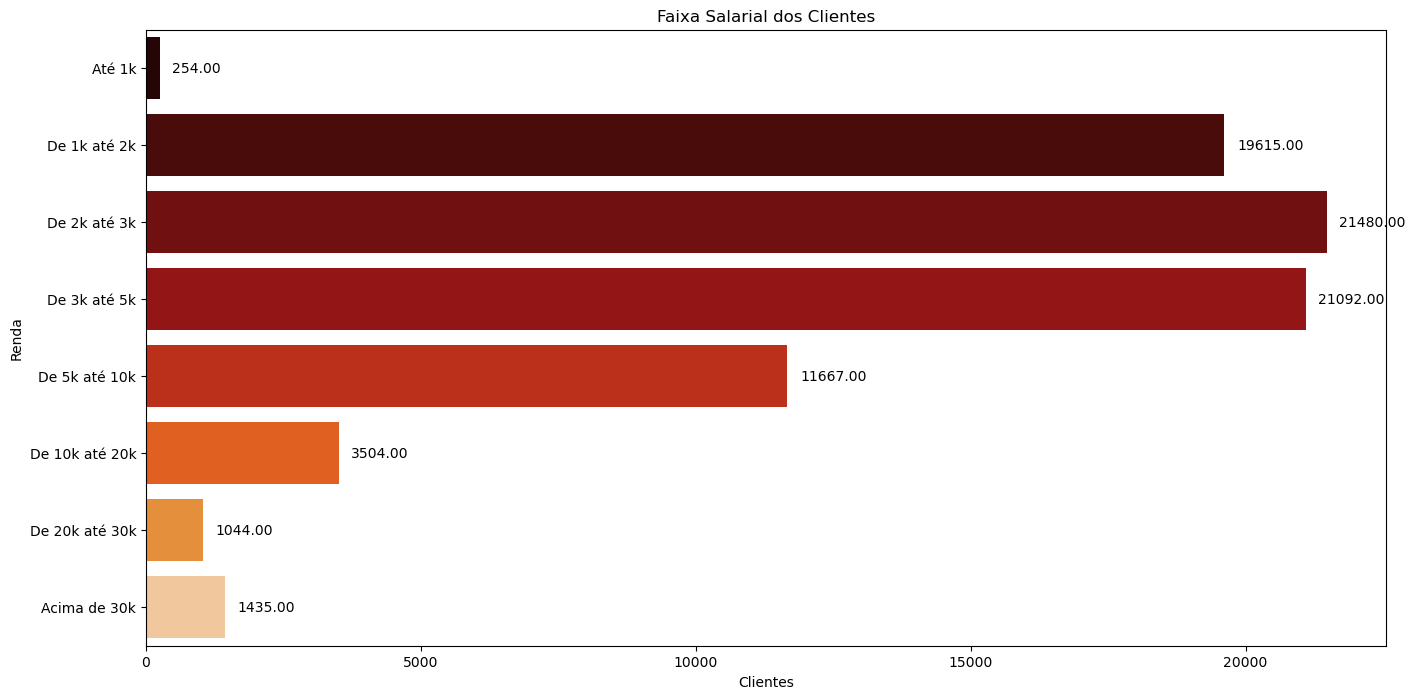

In [153]:
faixa_salarial = df.groupby('Faixa_Salarial')['Contrato'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Contrato', y='Faixa_Salarial', data=faixa_salarial, palette='gist_heat', orient='h')
plt.title('Faixa Salarial dos Clientes')
plt.xlabel('Clientes')
plt.ylabel('Renda')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                va='center', xytext=(9, 0), textcoords='offset points')

plt.show()

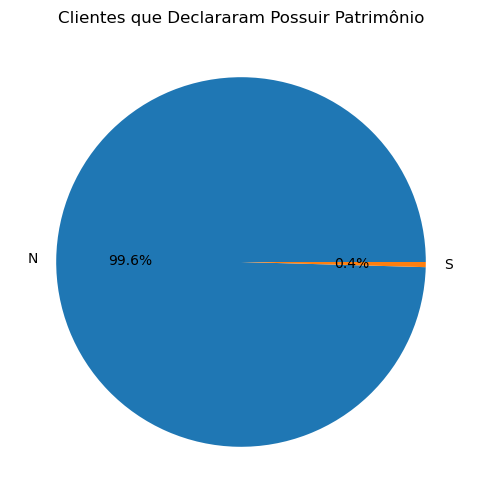

In [154]:
patrimonio = df.groupby('Possui_Patrimonio')['Contrato'].nunique().sort_values(ascending=False).reset_index()

# Configurando o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criando o gráfico de pizza
plt.pie(patrimonio['Contrato'], labels=patrimonio['Possui_Patrimonio'], autopct='%1.1f%%', colors=sns.color_palette('tab10'))

# Adicionando título e exibindo o gráfico
plt.title('Clientes que Declararam Possuir Patrimônio')
plt.show()

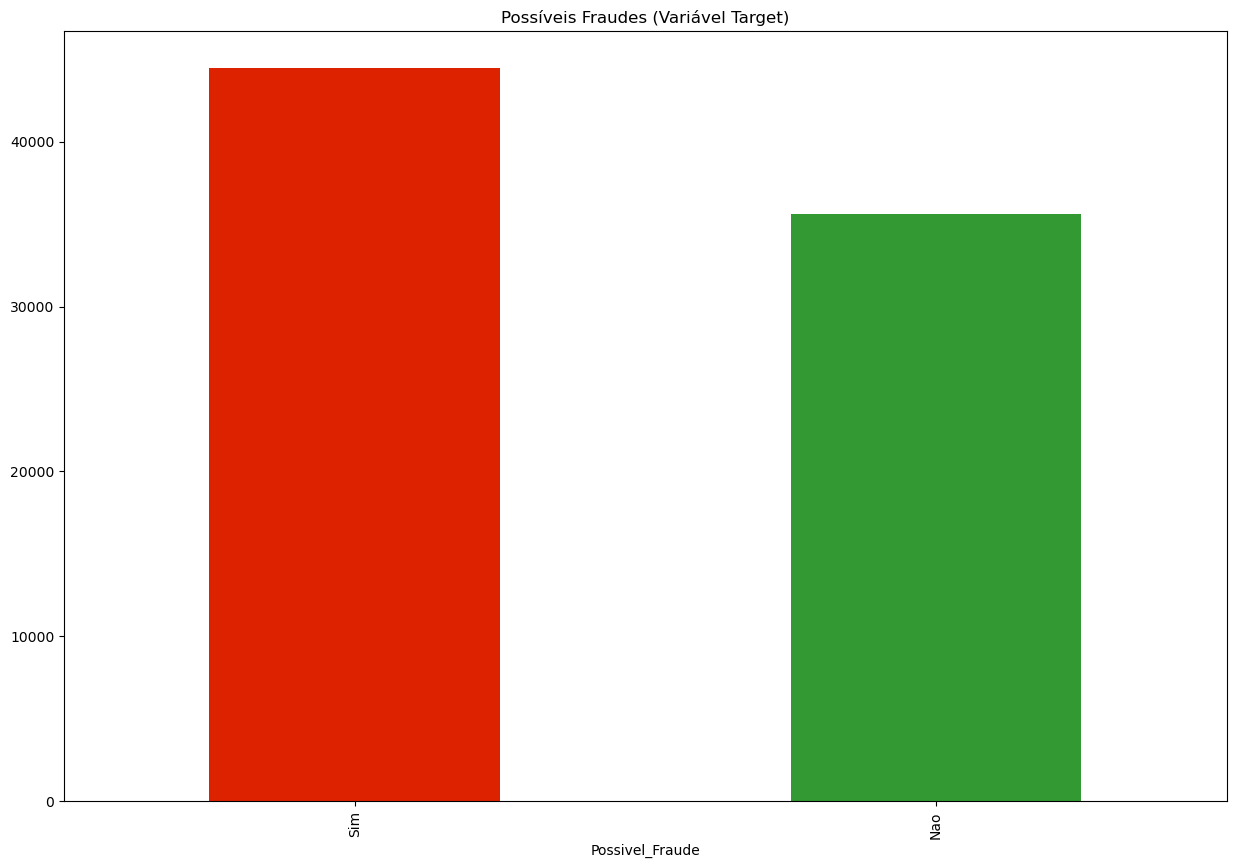

In [155]:
# Visualizando a distribuição da variável Alvo
df.Possivel_Fraude.value_counts().plot(kind='bar', title='Possíveis Fraudes (Variável Target)',color = ['#d20', '#393']);

### Reorganizando os dados mais relevantes para o modelo

In [156]:
df.columns

Index(['Contrato', 'Idade', 'Sexo', 'Valor_Renda', 'UF_Cliente', 'Perc_Juros',
       'Prazo_Emprestimo', 'Data_Contratacao', 'Prazo_Restante',
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'Escolaridade', 'Possui_Patrimonio',
       'VL_Patrimonio', 'QT_Parcelas_Atraso', 'QT_Dias_Atraso',
       'Saldo_Devedor', 'Total_Pago', 'Possivel_Fraude', 'Faixa_Etaria',
       'Faixa_Salarial', 'Faixa_Prazo_Emprestimo', 'Faixa_Prazo_Restante',
       'Faixa_Dias_Atraso'],
      dtype='object')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80091 entries, 0 to 80142
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Contrato                          80091 non-null  int64   
 1   Idade                             80091 non-null  int64   
 2   Sexo                              80091 non-null  object  
 3   Valor_Renda                       80091 non-null  float64 
 4   UF_Cliente                        80091 non-null  object  
 5   Perc_Juros                        80091 non-null  float64 
 6   Prazo_Emprestimo                  80091 non-null  int64   
 7   Data_Contratacao                  80091 non-null  object  
 8   Prazo_Restante                    80091 non-null  int64   
 9   VL_Emprestimo                     80091 non-null  float64 
 10  VL_Emprestimo_ComJuros            80091 non-null  float64 
 11  QT_Total_Parcelas_Pagas           80091 non-null  int64   


In [158]:
columns = ['Sexo', 'UF_Cliente', 'Faixa_Etaria', 'Perc_Juros', 
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'QT_Parcelas_Atraso', 'Saldo_Devedor', 
       'Total_Pago', 'Faixa_Prazo_Restante', 'Faixa_Salarial', 'Faixa_Prazo_Emprestimo', 
       'Faixa_Dias_Atraso', 'Possivel_Fraude']

df_mod = pd.DataFrame(df, columns=columns)

In [159]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80091 entries, 0 to 80142
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Sexo                              80091 non-null  object  
 1   UF_Cliente                        80091 non-null  object  
 2   Faixa_Etaria                      80091 non-null  category
 3   Perc_Juros                        80091 non-null  float64 
 4   VL_Emprestimo                     80091 non-null  float64 
 5   VL_Emprestimo_ComJuros            80091 non-null  float64 
 6   QT_Total_Parcelas_Pagas           80091 non-null  int64   
 7   QT_Total_Parcelas_Pagas_EmDia     80091 non-null  int64   
 8   QT_Total_Parcelas_Pagas_EmAtraso  80091 non-null  int64   
 9   Qt_Renegociacao                   80091 non-null  int64   
 10  Estado_Civil                      80091 non-null  object  
 11  QT_Parcelas_Atraso                80091 non-null  int64   


In [160]:
df_mod.isnull().sum()

Sexo                                0
UF_Cliente                          0
Faixa_Etaria                        0
Perc_Juros                          0
VL_Emprestimo                       0
VL_Emprestimo_ComJuros              0
QT_Total_Parcelas_Pagas             0
QT_Total_Parcelas_Pagas_EmDia       0
QT_Total_Parcelas_Pagas_EmAtraso    0
Qt_Renegociacao                     0
Estado_Civil                        0
QT_Parcelas_Atraso                  0
Saldo_Devedor                       0
Total_Pago                          0
Faixa_Prazo_Restante                0
Faixa_Salarial                      0
Faixa_Prazo_Emprestimo              0
Faixa_Dias_Atraso                   0
Possivel_Fraude                     0
dtype: int64